/Users/muchansk/repo/mlcap/.venv/lib/python3.13/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


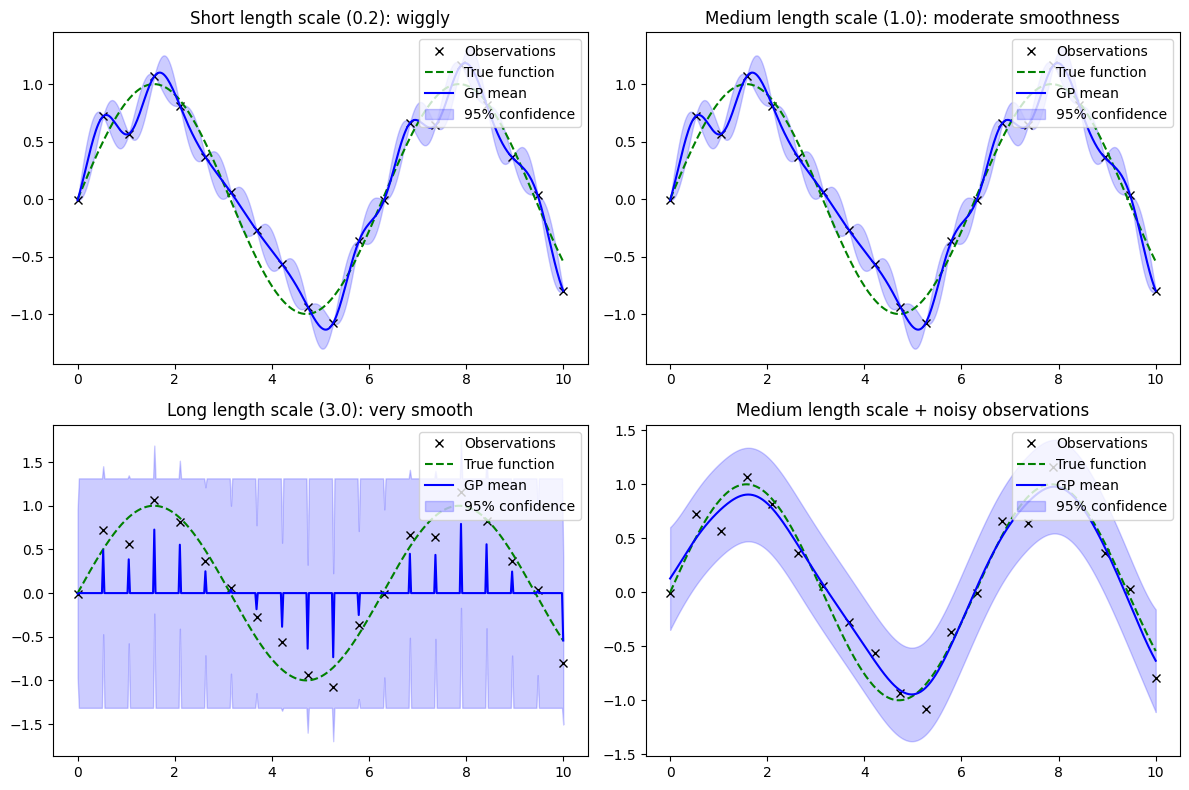

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel as C

# 1D input
X = np.linspace(0, 10, 20).reshape(-1, 1)
y = np.sin(X).ravel() + 0.2 * np.random.randn(len(X))

# Create a few kernels to compare
kernels = [
    C(1.0) * Matern(length_scale=0.2, nu=2.5) + WhiteKernel(noise_level=1e-5),
    C(1.0) * Matern(length_scale=1.0, nu=2.5) + WhiteKernel(noise_level=1e-5),
    C(1.0) * Matern(length_scale=3.0, nu=2.5) + WhiteKernel(noise_level=1e-5),
    C(1.0) * Matern(length_scale=1.0, nu=2.5) + WhiteKernel(noise_level=0.2)
]

titles = [
    "Short length scale (0.2): wiggly",
    "Medium length scale (1.0): moderate smoothness",
    "Long length scale (3.0): very smooth",
    "Medium length scale + noisy observations"
]

# Predict and plot
X_test = np.linspace(0, 10, 400).reshape(-1, 1)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for ax, kernel, title in zip(axes, kernels, titles):
    gp = GaussianProcessRegressor(kernel=kernel)
    gp.fit(X, y)
    y_pred, y_std = gp.predict(X_test, return_std=True)

    ax.plot(X, y, "kx", label="Observations")
    ax.plot(X_test, np.sin(X_test), "g--", label="True function")
    ax.plot(X_test, y_pred, "b", label="GP mean")
    ax.fill_between(
        X_test.ravel(),
        y_pred - 1.96 * y_std,
        y_pred + 1.96 * y_std,
        alpha=0.2,
        color="b",
        label="95% confidence"
    )
    ax.set_title(title)
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()